In [1]:
# from title_finder_kit import *  # po wklejeniu patcha i zapisaniu pliku
# set_error_verbosity(True)       # włącz szczegółowe logi

# # test jednego URI (pokaże czytelną przyczynę błędu)
# info = diagnose_gcs(rows[0]["plan_uri"])
# print(info)

# # spróbuj wczytać wszystko z jawnie rzuconym wyjątkiem
# best = rows[0]
# bundle = open_best_hit_verbose(best, show_graph=False, strict=True)

,combined_score,fuzzy_score,engine_score,display_id,mission_id,mission_type,outcome,tags,approved,final_score,lang,nodes_count,edges_count,plan_uri,transcript_uri,metrics_uri,txt_uri
0,72.560976,85.365854,0.0,20250829_212954-zbuduj-adaptacyjny-system-ml-z...,mission_20250829_212954_1e55a591,general,Success,"[optimized, robust]",True,94.9,pl,25.0,38.0,gs://external_memory/missions/2025/08/29/20250...,gs://external_memory/missions/2025/08/29/20250...,gs://external_memory/missions/2025/08/29/20250...,gs://external_memory/missions/2025/08/29/20250...
1,24.878049,29.268293,0.0,20250829_212413-stwórz-prosty-pipeline-do-anal...,mission_20250829_212413_92ed8ebc,data_processing,Success,"[data, optimized, robust]",True,94.7,pl,12.0,18.0,gs://external_memory/missions/2025/08/29/20250...,gs://external_memory/missions/2025/08/29/20250...,gs://external_memory/missions/2025/08/29/20250...,gs://external_memory/missions/2025/08/29/20250...


FULL plan_uri: gs://external_memory/missions/2025/08/29/20250829_212954-zbuduj-adaptacyjny-system-ml-z-continuous-learning-1e55a591.plan.json
{'has_storage_lib': True, 'client_init_ok': True, 'project': 'dark-data-discovery', 'uri': 'gs://external_memory/missions/2025/08/29/20250829_212954-zbuduj-adaptacyjny-system-ml-z-continuous-learning-1e55a591.plan.json', 'is_gs': True, 'exists': True, 'error': None, 'parent_list_sample': []}
plan.json: nodes=25 edges=38


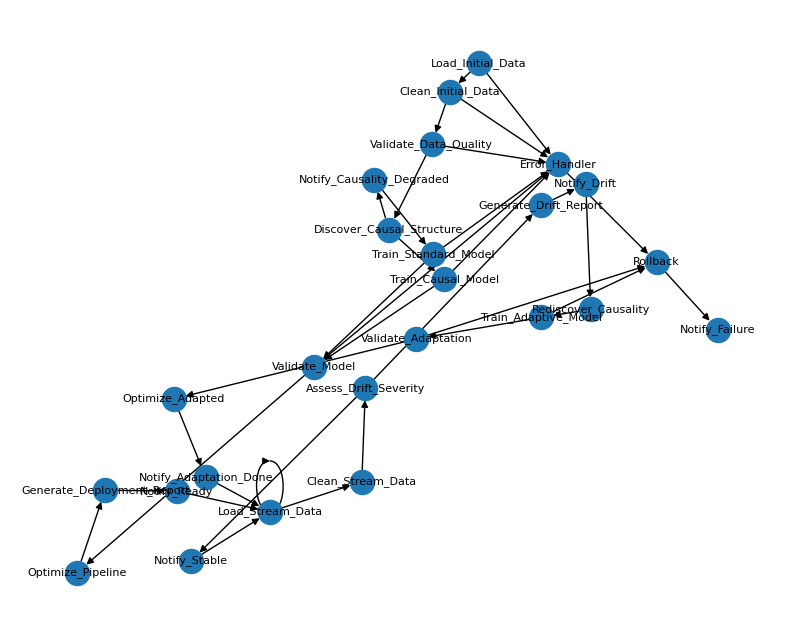

txt: sample: # Mission: Zbuduj adaptacyjny system ML z continuous learning
ID: mission_20250829_212954_1e55a591
Timestamp: 2025-08-29T21:29:54Z
Type: general
Tags: optimized, robust
Outcome | Score | Verdict: Success | 94.9 | ZATWIERDZONY

## Executive Summary
Misja zakończona w 1 iteracji. Zastosowano: optimization, adaptive routing, rollback mechanism. Struktura: 25 węzłów, 21 ścieżek sukcesu, 10 ścieżek obsługi błędów. Kluczowe komponenty: error_handler, validate_data, optimize_performance, rollback. Plan zatwierdzony przez krytyka bez zastrzeżeń.

## Final Plan (skrót)
Entry: Load_Initial_Data
Węzły: Load_Initial_Data, Clean_Initial_Data, Validate_Data_Quality, Discover_Causal_Structure, Train_Causal_Model, Train_Standard_Model, Validate_Model, Optimize_Pipeline, Generate_Deployment_Report, Notify_...
plan.json: keys: ['entry_point', 'nodes', 'edges']  total: 3
  nodes=25  edges=38
transcript.json: keys: ['mission_id', 'iterations', 'full_transcript']  total: 3
metrics.json: keys: 

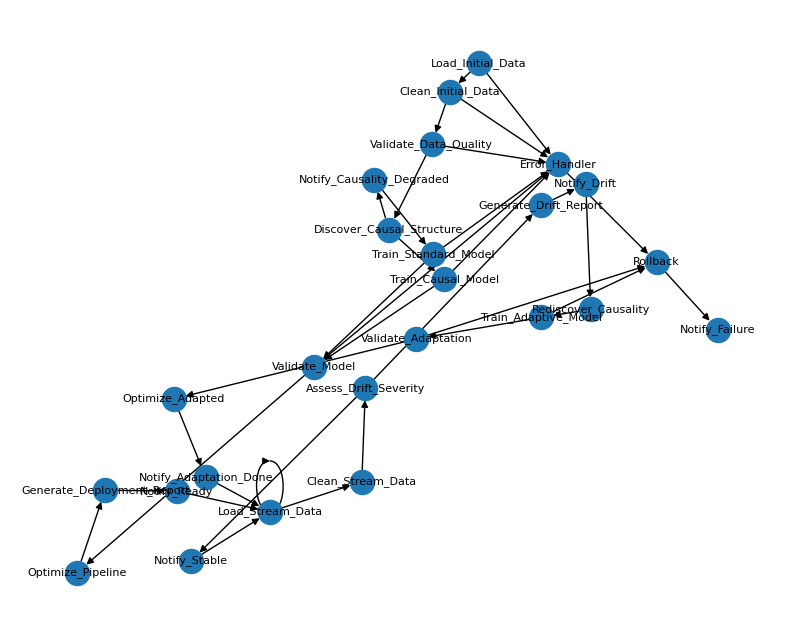

=== ANALYZE: plan ===
{
  "node_count": 25,
  "edge_count": 38,
  "sources": [
    "Load_Initial_Data"
  ],
  "sinks": [
    "Notify_Failure"
  ],
  "max_out_degree": 2,
  "max_in_degree": 6,
  "is_dag": false,
  "sample_cycle": [
    "Load_Stream_Data"
  ],
  "category_counts": {}
}
=== ANALYZE: transcript ===
{
  "turns": 5,
  "speakers": {
    "user": 5
  },
  "sample_first": "## MISJA\nZbuduj adaptacyjny system ML z continuous learning\n\nZaproponuj kompletny PLAN w formacie JSON {entry_point, nodes[], edges[]}.\nRola: Proposerzy proponują swoje wersje planu. Następnie Aggregator scala je w jedną, spójną propozycję. Na końcu, Quality_Critic oceni finalny, zagregowany plan.",
  "sample_last": "{\n  \"critique_summary\": {\n    \"verdict\": \"ZATWIERDZONY\",\n    \"statement\": \"Plan jest kompleksowy, solidny i innowacyjny. Właściwie adresuje wszystkie aspekty budowy adaptacyjnego systemu ML, włączając w to pętlę ciągłego uczenia, zaawansowane wykrywanie dryftu przyczynowego oraz wi

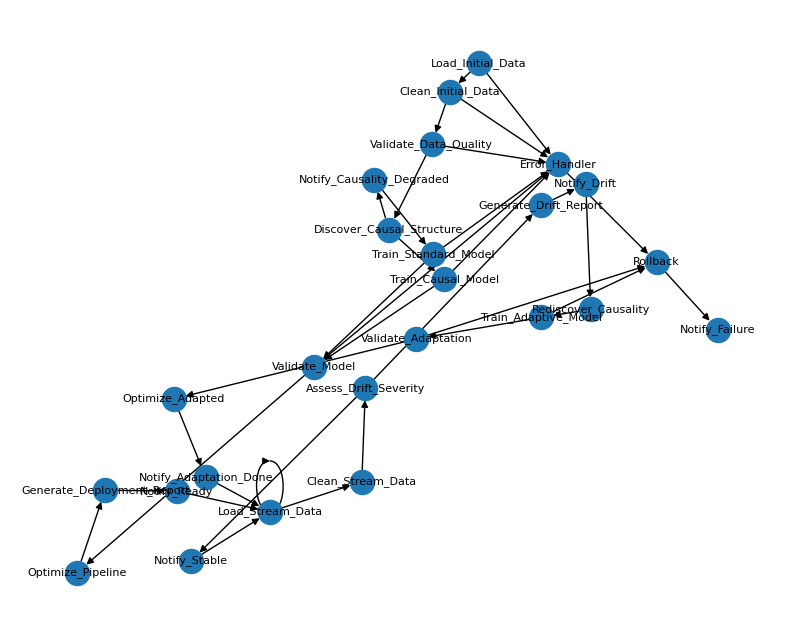

In [2]:
from title_finder_kit import *


serving_config = "projects/815755318672/locations/us/collections/default_collection/dataStores/external-memory-connector_1756845276280_gcs_store/servingConfigs/default_config"

rows = search_vertex(serving_config, "adaptacyjny system ml continuous learning", page_size=30)
rows = rerank_by_title("adaptacyjny system ml continuous learning", rows)
display(as_dataframe(rows))

best = rows[0]
print("FULL plan_uri:", best["plan_uri"])   # bez ucinania przez tabelę
info = diagnose_gcs(best["plan_uri"])      # pokaże czemu GCS nie działa (auth/perm/not found)
print(info)
bundle = open_best_hit_verbose(best, show_graph=True, strict=False) 


open_best_hit(best, show_graph=True)   # pobiera plan/transcript/metrics/txt z gs://
summary = analyze_best(best, show_graph=True)